In [ ]:
pip install scikit-plot

In [ ]:
# - Pandas
import pandas as pd
# - numpy
import numpy as np
# - seaborn
import seaborn as sb
# - scikitplot
import scikitplot as skplt
# - sklearn
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
# - imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings

sb.set_style("dark")
warnings.filterwarnings('ignore')

In [ ]:
database = pd.read_csv('cardcredit.csv')
database.head()

,defaulter,student,balance,income,escolaridade
0,0,0,729.526495,44361.62507,1
1,0,1,817.180407,12106.13470,4
2,0,0,1073.549164,31767.13895,2
3,0,0,529.250605,35704.49394,3
4,0,0,785.655883,38463.49588,5


1 = Fundamental

2 = Ensino Médio

3 = Ensino Superior

4 = Pós-graduação

5 = Mestrado

6 = Outros

<h1>Estatística


In [ ]:
database.describe()

,defaulter,student,balance,income,escolaridade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876,3.497200
std,0.179428,0.455795,483.714985,13336.639563,1.699789
min,0.000000,0.000000,0.000000,771.967729,1.000000
25%,0.000000,0.000000,481.731105,21340.462905,2.000000
50%,0.000000,0.000000,823.636973,34552.644800,4.000000
75%,0.000000,1.000000,1166.308387,43807.729275,5.000000
max,1.000000,1.000000,2654.322576,73554.233500,6.000000


Variância


In [ ]:
database.var()

defaulter       3.219433e-02
student         2.077494e-01
balance         2.339802e+05
income          1.778660e+08
escolaridade    2.889281e+00
dtype: float64

<h1>Correlação das Variáveis</h1>




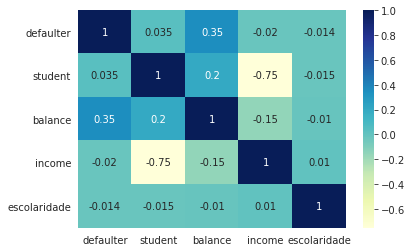

In [ ]:
tabela = pd.DataFrame(database)
tabela['defaulter'] = database
correlacoes = tabela.corr()
sb.heatmap(correlacoes, cmap="YlGnBu", annot = True)

<h1>Treinamento</h1>

In [ ]:
# separar variáveis entre X e y
X = database.drop('defaulter', axis=1)
y = database['defaulter']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

<h2>Sem Rebalanceamento</h2>


    Adimplente : 9667
    Inadimplente: 333 (3.33%)
    


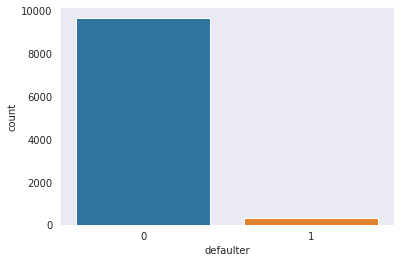

In [7]:
neg, pos = np.bincount(database['defaulter'])
total = neg + pos

print(
    '''
    Adimplente : {}
    Inadimplente: {} ({:.2f}%)
    '''.format(neg, pos, 100*pos/total)
)
sb.countplot('defaulter', data = database);

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9753    0.9934    0.9842      2420
         1.0     0.5429    0.2375    0.3304        80

    accuracy                         0.9692      2500
   macro avg     0.7591    0.6154    0.6573      2500
weighted avg     0.9614    0.9692    0.9633      2500

Acurácia: 0.9692

AUC: 0.6154



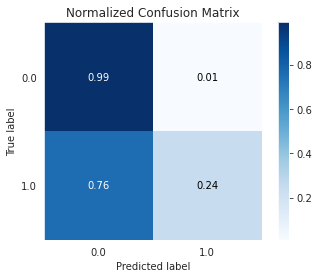

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

<h2>Rebalanceamento</h2>

<h3>UnderSample</h3>

1    241
0    241
dtype: int64


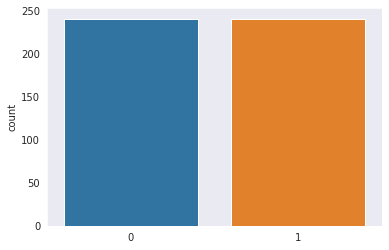

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sb.countplot(y_res)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9949    0.8178    0.8977      2398
           1     0.1739    0.9020    0.2916       102

    accuracy                         0.8212      2500
   macro avg     0.5844    0.8599    0.5946      2500
weighted avg     0.9614    0.8212    0.8730      2500

Acurácia: 0.8212

AUC: 0.8599



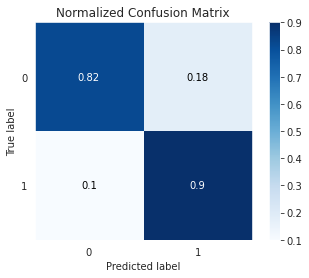

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))

<h3>OverSample</h3>

1    7269
0    7269
dtype: int64


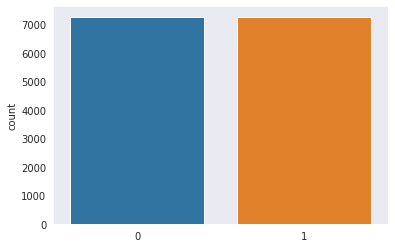

In [ ]:
# usar técnica under-sampling
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train, y_train)
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sb.countplot(y_res)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9918    0.6518    0.7866      2398
           1     0.0963    0.8725    0.1735       102

    accuracy                         0.6608      2500
   macro avg     0.5440    0.7622    0.4801      2500
weighted avg     0.9552    0.6608    0.7616      2500

Acurácia: 0.6608

AUC: 0.7622



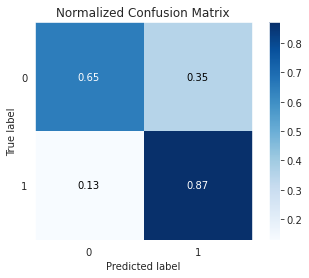

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))

<h1>Quadratic Discriminant Analysis<h1>

1    7269
0    7269
dtype: int64


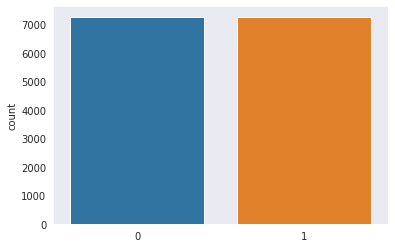

In [ ]:
# usar técnica under-sampling
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train, y_train)
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sb.countplot(y_res)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9960    0.8411    0.9121      2398
           1     0.1979    0.9216    0.3258       102

    accuracy                         0.8444      2500
   macro avg     0.5970    0.8813    0.6189      2500
weighted avg     0.9635    0.8444    0.8881      2500

Acurácia: 0.8444

AUC: 0.8813



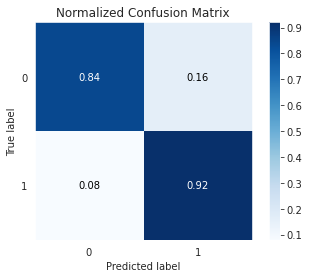

In [ ]:
# instanciar e treinar um modelo de Quadratic Discriminant Analysis
model_res = QuadraticDiscriminantAnalysis()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))

<h1>K NN<h1>

1    7269
0    7269
dtype: int64


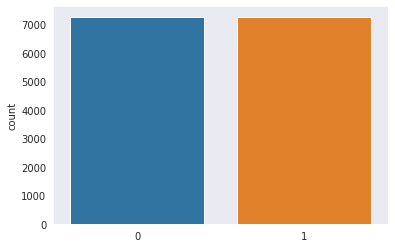

In [ ]:
# usar técnica under-sampling
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train, y_train)
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sb.countplot(y_res)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9805    0.9429    0.9613      2398
           1     0.2938    0.5588    0.3851       102

    accuracy                         0.9272      2500
   macro avg     0.6372    0.7508    0.6732      2500
weighted avg     0.9525    0.9272    0.9378      2500

Acurácia: 0.9272

AUC: 0.7508



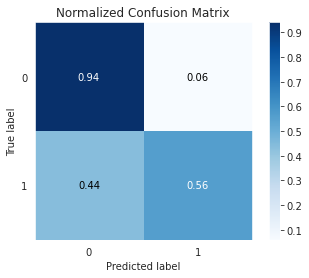

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model_res = KNeighborsClassifier()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))